In [1]:
! which python

/data01/homes/dipiano/.conda/envs/scitools/bin/python


In [2]:
from sagsci.tools.fits import Fits

phlist = '/data01/homes/dipiano/DATA/obs/backgrounds/bkg000001.fits'

To avoid overwriting the original file, make a copy and save the selected photon list separately

In [3]:
import os
selected_phlist = phlist.replace(".fits", "_selected.fits")
os.system(f'cp {phlist} {selected_phlist}')
selected_phlist

'/data01/homes/dipiano/DATA/obs/backgrounds/bkg000001_selected.fits'

- initialise class
- get DL3 pointing
- get DL3 data
- apply selection cuts
- set DL3 selected data
- save to new photon list

In [21]:
f = Fits()
pointing = {'ra': f.get_dl3_hdr(selected_phlist)['RA_PNT'], 'dec': f.get_dl3_hdr(selected_phlist)['DEC_PNT']}
dl3 = f.get_dl3_data(selected_phlist)
dl3_selected = f.selection_cuts(dl3, pointing, trange=None, erange=[0.04, 1], maproi=1.5)
f.set_dl3_data(selected_phlist, dl3_selected, GTI=[0, 10])

Plot the original DL3 and the selected DL3 directly into counts maps.

In [22]:
from sagsci.tools.plotting import SkyImage

im = SkyImage()
im.set_pointing_from_dict(pointing)
im.counts_map(phlist, name='skymap.png', figsize=(5, 5), fontsize=12)
im.counts_map(selected_phlist, name='skymap_selected.png', figsize=(5, 5), fontsize=12)

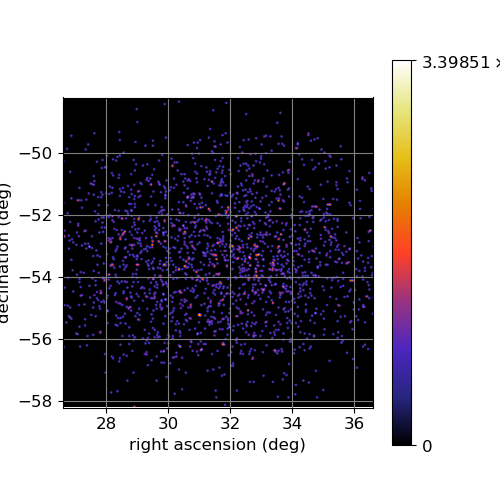

In [23]:
from IPython.display import Image
Image(filename='skymap.png') 

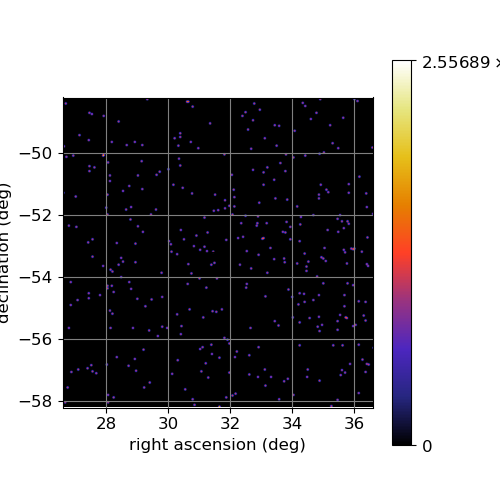

In [24]:
Image('skymap_selected.png')